# Introduction to Pandas and Numpy. Part 1.

## Import libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


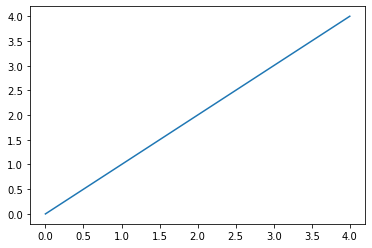

In [2]:
plot(arange(5))

In [3]:
# reading the dataset in a DataFrame
df = pd.read_csv("/mnt/c/Users/Monikita/Downloads/data-scientist/loan_prediction/train.csv")

## Quick Data Exploration

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Looking at the above table we can make some inferences.

* LoanAmount has 22 missing values.
* Loan_Amount_Term has 14 missing values.
* Credit_History has 50 missing values.
* 84% of applicants has a credit history. Drawing this from the Credit_History mean and its binary nature.
* The ApplicantIncome and CoappplicantIncome distributions seems to be in line with expectation.

In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

## Distribution Analysis

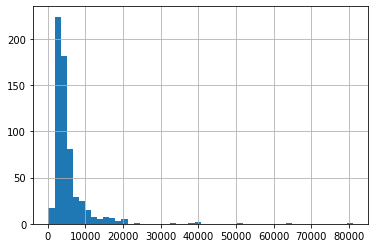

In [8]:
df['ApplicantIncome'].hist(bins=50);

There are few extreme values for the applicant income.

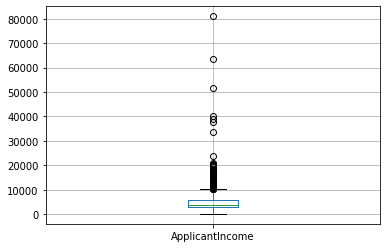

In [9]:
df.boxplot(column='ApplicantIncome');

We can observe the presence of outliers regarding the applicant income. Income disparity in society can be the reason for that.

Let us investigate the applicant distribution segregated by education level.

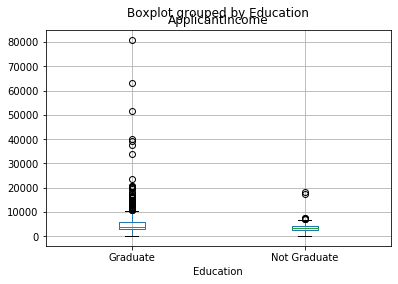

In [10]:
df.boxplot(column='ApplicantIncome', by='Education');

In terms of the mean income, there is no distinction between graduated and not graduated people. But, for graduates, there are higher numbers with very high incomes.

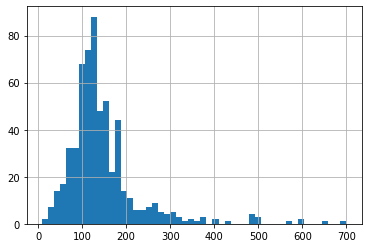

In [11]:
df['LoanAmount'].hist(bins=50);

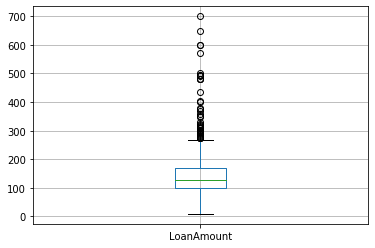

In [12]:
df.boxplot(column='LoanAmount');

There is also extreme values for loan amount.

## Categorical variable analysis

In [24]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [25]:
print('Frequency Table for Credit History:')
print(temp1)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [26]:
print(temp2)
print(temp2.size)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789
2


In [31]:
# https://stackoverflow.com/questions/50013162/subplotting-pandas-pivot-table-into-matplotlib-figure-creates-a-new-figure
temp2 = temp2.squeeze()

In [32]:
print(temp2)
print(temp2.size)

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64
2


Text(0.5, 1.0, 'Probability of getting loan by credit history')

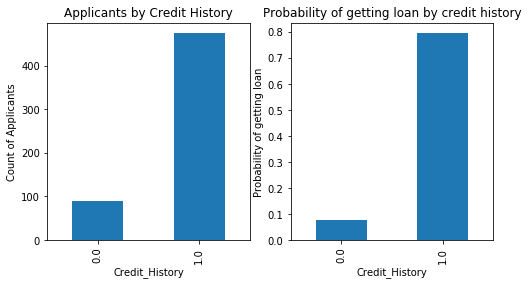

In [33]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')

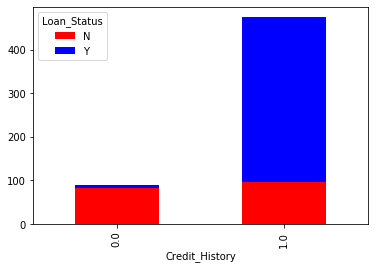

In [35]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False);

## Data Munging in Python. Using Pandas.

Your must wear shoes to start running.

1. There are missing values. We should estimate wisely those values depending on the amount of them and the expected importance of variables.

2. While looking at distributions, extreme values were encountered. They should be treated appropriately.

### Stacking recommendation. Another article. 7 Steps of Data Exploration & Preparation.

* Data exploration, cleaning and preparation would take 70% of your total project time.

* Steps involved to understand, clean and prepare your data for building your predictive model.


1. Variable identification; 
2. Univariate analysis;
3. Bi-variate analysis;
4. Missing values treatment; 
5. Outlier treatment; 
6. Variable transformation; 
7. Variable creation.


* Need to iterate over steps 4 - 7 multiple times before we come up with our refined model.

### Reading the recommended article. 12 Useful Pandas Techniques in Python for Data Manipulation.

* Pandas along with Scikit-learn provides almost the entire stack needed by a data scientist.
* Boolean indexing to filter values of a column based on another columns using data.loc.
* Apply function to check, for instance, missing values, axis=0 checks in column, axis=1 checks in row.
* Imputing missing values using fillna function. If using mode, can import the function mode from scipy.stats.
* Pivot table creation as in Excel.
* Multi-indexing using more than one value, loc work with that.
* Crosstab to get an initial feel, view of the data. Validatin some basic hyphotesis for instance with bi-variate analysis between predictor and target variables.
* Merge DataFrames to use information from different sources.
* Sorting DataFrame using sort_values function.
* Plotting for boxplots and histograms using Pandas itself, functions boxplot and hist.
* Cut functions for binning to cluster numerical values in relevant categories.
* Coding nominal data for algorithms that requires numbers, diversity in value for a same semantic category and very low frequencies that would be better to being take into account together.
* Iterating over rows of a dataframe to solve inconsistencies in datatype. To use a auxiliar csv file containing feature name and the correct datatype. So, using iterrows function to iterate.

### Check missing values in the dataset

In [38]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values may not always be NaNs. So, to analyze whether it makes sense or not.

In [40]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [41]:
df['Self_Employed'].fillna('No', inplace=True)

In [42]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def table_value(x):
    return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values
df['LoanAmount'][df['LoanAmount'].isnull()] = df[df['LoanAmount'].isnull()].apply(table_value, axis=1)

/home/monica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### How to treat extreme values in distributions?

To make sense about the meaning of the extreme values. For example, in the loan amount, some people really might apply for high value loans due to specific needs. So, instead of treating them as outliers, to try a log transformation to nullify their effect.

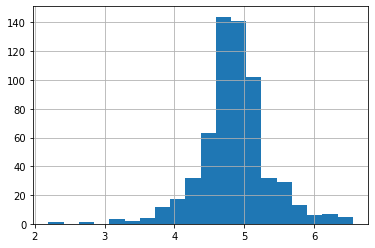

In [46]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks closer to normal.

In terms of applicant incomes, some applicants can have lower income but strong support from co-applicants. It might be so a good idea to combine both incomes as total income and take a log transformation of the same.

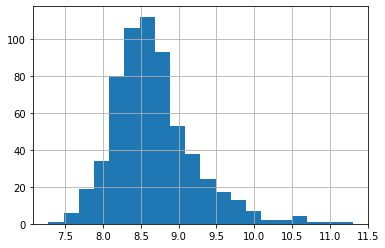

In [47]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)